In [ ]:
ifile = '../out/associations_annotated.tsv'
sfile = '../data/reference.fasta'
kfile = '../out/ko_scores_annotated.txt'
ffile = '../out/SGD_sorted_features.bed'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as mc
import colorsys

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
import roman
import numpy as np
import pandas as pd
from Bio import SeqIO
from scipy import stats

In [4]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    
    source: https://stackoverflow.com/a/49601444/1237531
    """
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [5]:
def newyork_plot(m, s, cond):
    plt.figure(figsize=(12, 12))

    plt.subplot(511)

    df = m.loc[cond]

    color = sns.xkcd_rgb['dark grey']

    xticks = []
    i = 0
    for c in range(1, 17):
        if c % 2:
            color = lighten_color(color, 0.5)
        else:
            color = sns.xkcd_rgb['dark grey']
        plt.plot(df.loc[c, 'pos'] + i,
                 -np.log10(df.loc[c, 'pvalue']),
                 '.',
                 color=color)
        xticks.append((i + d[c]/2, roman.toRoman(c)))
        i += d[c]

    plt.ylabel('association\n$-log_{10}(pvalue)$')
    plt.xticks([])
    plt.title(cond)
    plt.axhline(6,
                color='grey',
                ls='dashed')
    # plt.xticks([x for x, y, in xticks],
    #            [y for x, y, in xticks],)
    
    plt.xlim(0, i)

    ylim = -np.log10(s.loc[cond]['qvalue'])

    for i, strain in enumerate(strains):
        plt.subplot(5, 1, i+2)

        df = s.loc[cond]
        df = df.loc[strain]

        color = cstrains[strain]

        xticks = []
        i = 0
        for c in range(1, 17):
            if c % 2:
                color = lighten_color(color, 0.5)
            else:
                color = cstrains[strain]
            try:
                plt.plot(df.loc[c, 'pos'] + i,
                         -np.log10(df.loc[c, 'qvalue']),
                         '.',
                         color=color)
            except:
                pass
            xticks.append((i + d[c]/2, roman.toRoman(c)))
            i += d[c]
        plt.xticks([])
        plt.ylim(-2, ylim.max()+2)
        plt.ylabel('KO qvalue\n(%s)' % strain)
        plt.axhline(2,
                    color='grey',
                    ls='dashed')
        
        plt.xlim(0, i)

    plt.xticks([x for x, y, in xticks],
               [y for x, y, in xticks],)

    plt.subplots_adjust(hspace=0);

In [6]:
def newyork_plot_restrict(m, s, cond, chromosomes):
    plt.figure(figsize=(7, 6))

    plt.subplot(511)

    df = m.loc[cond]

    color = sns.xkcd_rgb['dark grey']

    xticks = []
    i = 0
    for c in chromosomes:
        if c % 2:
            color = lighten_color(color, 0.5)
        else:
            color = sns.xkcd_rgb['dark grey']
        plt.plot(df.loc[c, 'pos'] + i,
                 -np.log10(df.loc[c, 'pvalue']),
                 '.',
                 color=color)
        xticks.append((i + d[c]/2, roman.toRoman(c)))
        i += d[c]

    plt.ylabel('association\n$-log_{10}(pvalue)$')
    plt.xticks([])
    plt.title(cond)
    plt.axhline(6,
                color='grey',
                ls='dashed')
    # plt.xticks([x for x, y, in xticks],
    #            [y for x, y, in xticks],)
    
    plt.xlim(0, i)

    ylim = -np.log10(s.loc[cond]['qvalue'])

    for i, strain in enumerate(strains):
        plt.subplot(5, 1, i+2)

        df = s.loc[cond]
        df = df.loc[strain]

        color = cstrains[strain]

        xticks = []
        i = 0
        for c in chromosomes:
            if c % 2:
                color = lighten_color(color, 0.5)
            else:
                color = cstrains[strain]
            try:
                plt.plot(df.loc[c, 'pos'] + i,
                         -np.log10(df.loc[c, 'qvalue']),
                         '.',
                         color=color)
            except:
                pass
            xticks.append((i + d[c]/2, roman.toRoman(c)))
            i += d[c]
        plt.xticks([])
        plt.ylim(-2, ylim.max()+2)
        plt.ylabel('KO qvalue\n(%s)' % strain)
        plt.axhline(2,
                    color='grey',
                    ls='dashed')
        
        plt.xlim(0, i)

    plt.xticks([x for x, y, in xticks],
               [y for x, y, in xticks],)

    plt.subplots_adjust(hspace=0);

In [7]:
def newyork_plot_gwas(m, s, conds):
    plt.figure(figsize=(12, 12))

    for i, cond in enumerate(conds[:5]):
        plt.subplot(5, 1, i+1)

        df = m.loc[cond]

        color = sns.xkcd_rgb['dark grey']

        xticks = []
        i = 0
        for c in range(1, 17):
            if c % 2:
                color = lighten_color(color, 0.5)
            else:
                color = sns.xkcd_rgb['dark grey']
            plt.plot(df.loc[c, 'pos'] + i,
                     -np.log10(df.loc[c, 'pvalue']),
                     '.',
                     color=color)
            xticks.append((i + d[c]/2, roman.toRoman(c)))
            i += d[c]

        plt.ylabel('association\n$-log_{10}(pvalue)$')
        plt.xticks([])
        plt.title(cond)
        plt.axhline(6,
                    color='grey',
                    ls='dashed')
        # plt.xticks([x for x, y, in xticks],
        #            [y for x, y, in xticks],)

        plt.xlim(0, i)

    plt.xticks([x for x, y, in xticks],
               [y for x, y, in xticks],)

    plt.subplots_adjust(hspace=0.2);

In [8]:
f = pd.read_table(ffile,
                  header=None)
f.columns = ['chrom', 'start', 'stop', 'gene']
f['pos'] = (f['start'] + f['stop']) / 2

In [9]:
d = {}
for s in SeqIO.parse(sfile, 'fasta'):
    try:
        seq = roman.fromRoman(s.id.replace('chr', ''))
        d[seq] = len(s)
    except:
        pass

In [10]:
m = pd.read_table(ifile).set_index(['condition',
                                    'chrom']).sort_index()

In [11]:
s = pd.read_table(kfile, index_col=[0, 2, 1])
agenes = None
for st in {x[0] for x in s.index}:
    gs = {x[0] for x in s.loc[st].index}
    if agenes is None:
        agenes = gs
    else:
        agenes = agenes.intersection(gs)
s = pd.read_table(kfile).set_index('gene'
        ).loc[agenes].reset_index().set_index([
        'condition',
        'strain', 'chrom']).sort_index()

In [12]:
agenes = agenes.intersection(f['gene'].unique())

In [13]:
conds = sorted({x[0] for x in m.index}.intersection({x[0] for x in s.index}))

In [14]:
strains = ['S288C', 'Y55',
           'UWOP', 'YPS']
cstrains = {x: c
            for x, c in zip(strains, sns.color_palette('Set1', len(strains)))}

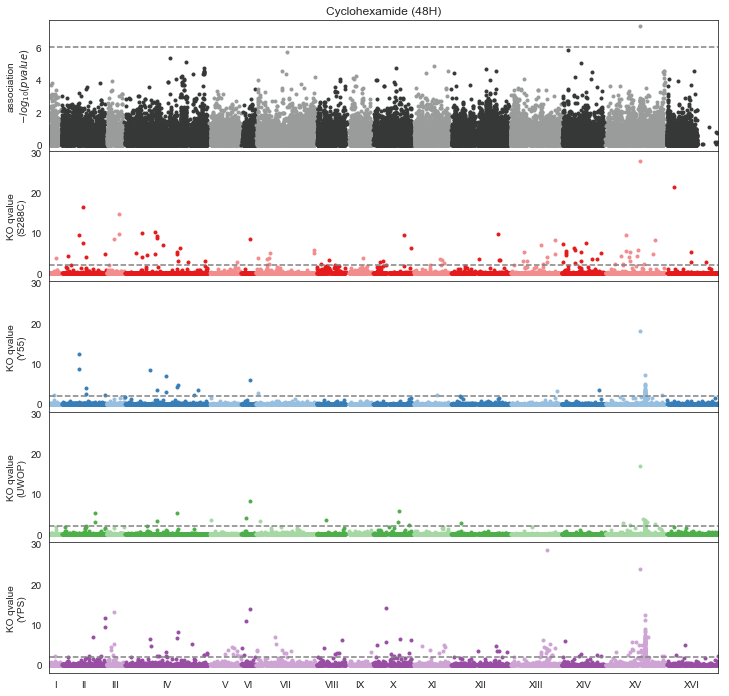

In [15]:
newyork_plot(m, s, 'Cyclohexamide (48H)')

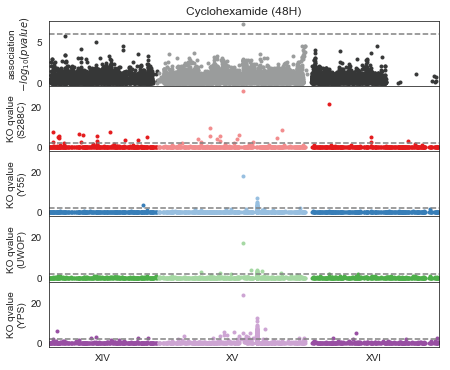

In [16]:
newyork_plot_restrict(m, s, 'Cyclohexamide (48H)',
                      [14, 15, 16])

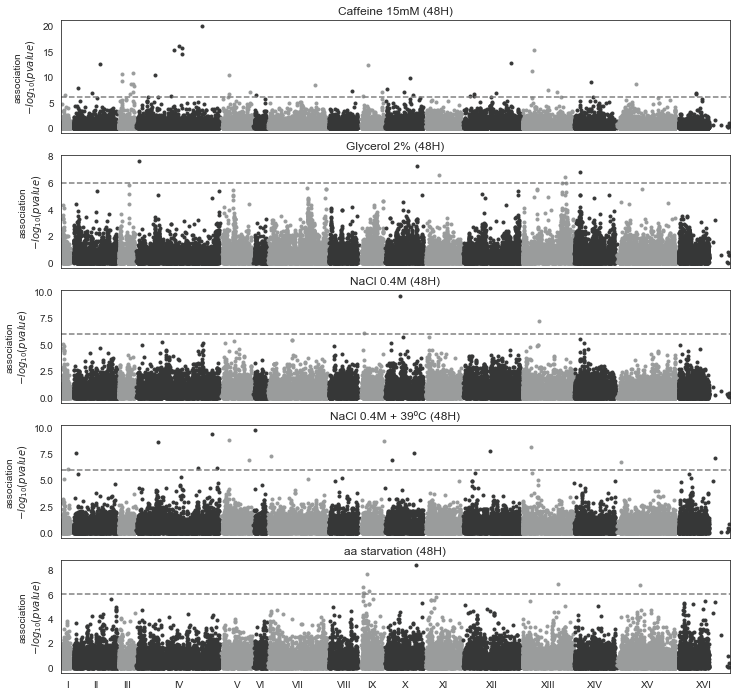

In [17]:
newyork_plot_gwas(m, s, ['Caffeine 15mM (48H)',
                         'Glycerol 2% (48H)',
                         'NaCl 0.4M (48H)',
                         'NaCl 0.4M + 39ºC (48H)',
                         'aa starvation (48H)'])

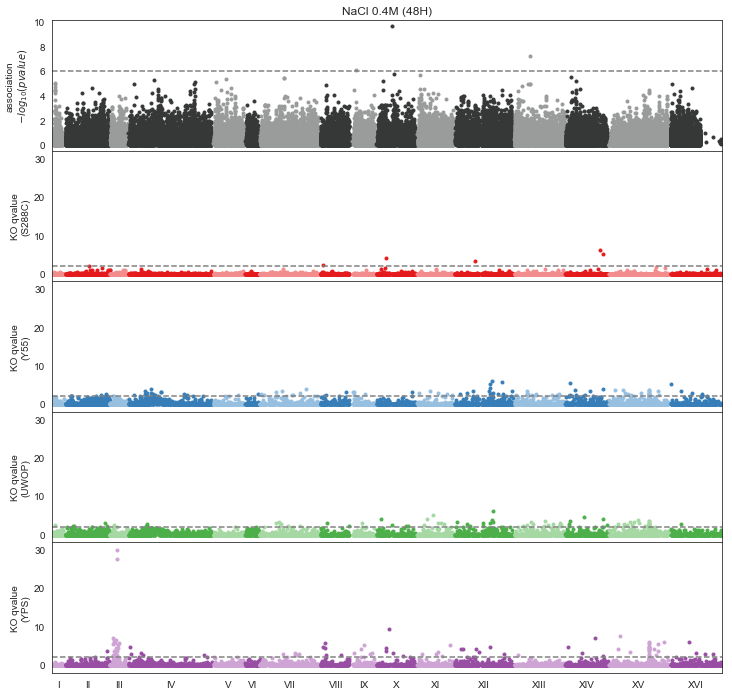

In [18]:
newyork_plot(m, s, 'NaCl 0.4M (48H)')

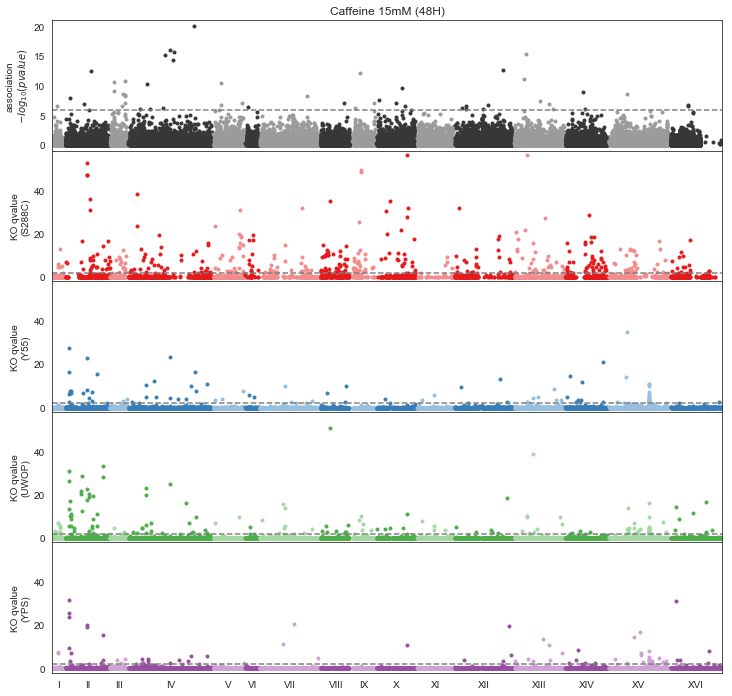

In [19]:
newyork_plot(m, s, 'Caffeine 15mM (48H)')

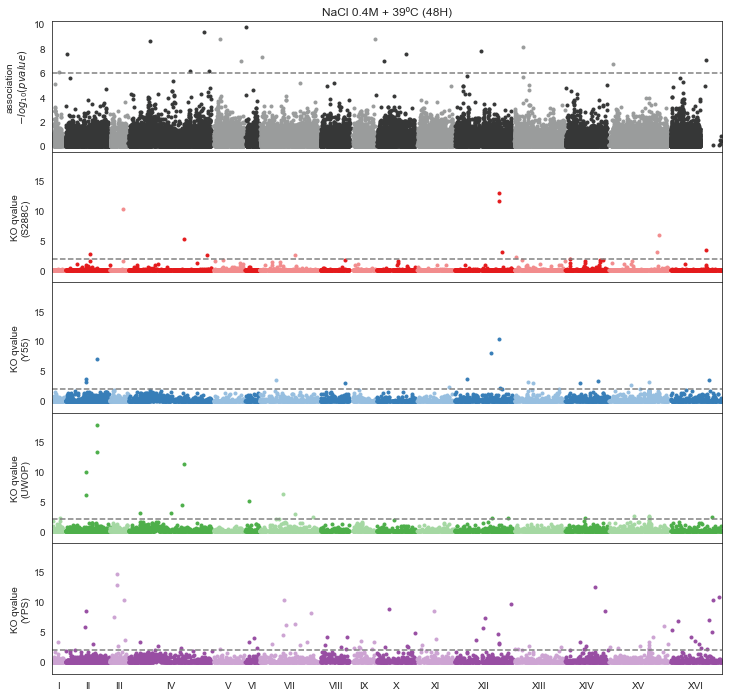

In [20]:
newyork_plot(m, s, 'NaCl 0.4M + 39ºC (48H)')

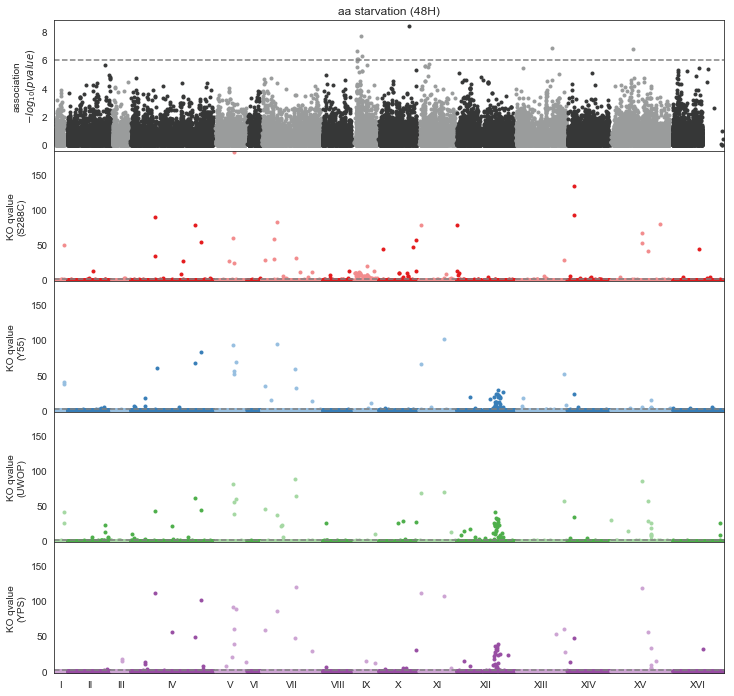

In [21]:
newyork_plot(m, s, 'aa starvation (48H)')